# Scoring and EDA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import seaborn as sns #visualizations
import matplotlib.pyplot as plt #visualizations
import re, string #cleaning

%matplotlib inline 

from nltk.sentiment.vader import SentimentIntensityAnalyzer 
sid = SentimentIntensityAnalyzer()



### Read in CSV files

In [2]:
kanye = pd.read_csv('kanye.csv')
kanye = kanye.iloc[:,1:]
display(kanye.tail())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
3687,1026847710958235651,Next To Me🔥\nFULL BEAT ON THE WEBSITE! (Link ...,2018-08-07 15:09:06,18,0,Twitter Lite,NaN,1015940906988556289,Simphiw86499247,TONNY C,2018-07-08 12:49:22,581,575,"KZN ,Ingwavuma"
3688,1026845455811002368,roof all this synth swinging contest. We all g...,2018-08-07 15:00:09,0,0,HipsterTweets,NaN,703385241000550401,KanyeHipster,Hipster Kanye,2016-02-27 01:04:44,33,2,NaN
3689,1026837242357182464,Adidas x Pharrell NMD Solar Pack releases Aug...,2018-08-07 14:27:30,1,0,Twitter for iPhone,NaN,3057538985,jawil88,Bic Michem,2015-02-23 23:26:07,34,204,NaN
3690,1026835983973711872,Fitz said he face timed husband Kanye not sur...,2018-08-07 14:22:30,0,0,Instagram,United Kingdom,39082359,BAILEYVIEW,GINETTE PERRY,2009-05-10 17:39:40,738,2717,leicester
3691,1026834754111516673,We finally get to the long awaited Drake scor...,2018-08-07 14:17:37,1,0,Justasample,NaN,937978469207695362,skeretatadj,💲kere Tata,2017-12-05 09:34:28,797,560,IG: Skeretata


In [3]:
kanyewest = pd.read_csv('allwest.csv')
kanyewest = kanyewest.iloc[:,2:]
display(kanyewest.tail())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
31677,1027346114972794880,One of the greatest videos/songs ever created....,2018-08-09 00:09:35,0,0.0,Instagram,NaN,3903543135,DxPEJUNKIE,DXPESHXT,2015-10-08 23:00:10,226.0,468.0,"Paterson, NJ"
31678,1027345266825945088,7 years ago WatchThethrone came out. A classi...,2018-08-09 00:06:13,35,0.0,Twitter for Android,NaN,984848006112571392,stinger_beats,Wesley,2018-04-13 17:37:17,318.0,493.0,South Africa
31679,1027344045692076034,Hip Hop Needs WTT 2 \n\nJAYZ KanyeWest WatchT...,2018-08-09 00:01:22,15,0.0,Twitter for iPhone,NaN,3115342371,Poetical_lucas,مصطفى,2015-03-25 17:40:14,175.0,182.0,Nirvana
31680,1027343895150112769,Children of the Sun watch out we coming for ya...,2018-08-09 00:00:46,0,0.0,Instagram,NaN,735395497,VictorTheTitan,ELÓDREAM🔥🌹🦋,2012-08-03 19:17:37,22864.0,17497.0,"Artland ERR' Wurr,Planet Earff"
31681,1027343739214352384,KanyeWest cost JamesCorden $45K after cancelli...,2018-08-09 00:00:09,0,0.0,SocialFlow,NaN,22671321,1043MYfm,1043 MYfm,2009-03-03 20:14:49,22975.0,1242.0,"Los Angeles, CA"


In [4]:
allkanye = pd.concat([kanye, kanyewest], sort=True) 
allkanye.drop_duplicates(subset=['text', 'user_id'], keep='first', inplace=True) ##For all duplicate tweets from one user, only keep the first
display(allkanye.head(2))
display(allkanye.tail(2))
display(allkanye.info())

,country,created_at,favorite_count,id,retweet_count,source,text,user_created_at,user_followers_count,user_friends_count,user_id,user_location,user_name,user_screen_name
0,NaN,2018-08-17 15:53:37,0.0,1030482792034062336,1,TweetDeck,Tomorrow author of HipHopRaisedMe and host o...,2014-12-28 20:48:15,320.0,405.0,2946476236,"London, England",No Chiefs,NoChiefsCo
1,NaN,2018-08-17 15:52:50,0.0,1030482594662699014,1,TweetDeck,Tomorrow author of HipHopRaisedMe and host of...,2009-05-05 12:56:56,20300.0,3210.0,37917369,London,Thames & Hudson,thamesandhudson


,country,created_at,favorite_count,id,retweet_count,source,text,user_created_at,user_followers_count,user_friends_count,user_id,user_location,user_name,user_screen_name
31680,NaN,2018-08-09 00:00:46,0.0,1027343895150112769,0,Instagram,Children of the Sun watch out we coming for ya...,2012-08-03 19:17:37,22864.0,17497.0,735395497,"Artland ERR' Wurr,Planet Earff",ELÓDREAM🔥🌹🦋,VictorTheTitan
31681,NaN,2018-08-09 00:00:09,0.0,1027343739214352384,0,SocialFlow,KanyeWest cost JamesCorden $45K after cancelli...,2009-03-03 20:14:49,22975.0,1242.0,22671321,"Los Angeles, CA",1043 MYfm,1043MYfm


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35322 entries, 0 to 31681
Data columns (total 14 columns):
country                 273 non-null object
created_at              35320 non-null object
favorite_count          35319 non-null float64
id                      35321 non-null object
retweet_count           35320 non-null object
source                  35320 non-null object
text                    35321 non-null object
user_created_at         35320 non-null object
user_followers_count    35319 non-null float64
user_friends_count      35319 non-null float64
user_id                 35320 non-null object
user_location           24582 non-null object
user_name               35317 non-null object
user_screen_name        35320 non-null object
dtypes: float64(3), object(11)
memory usage: 4.0+ MB


None

In [5]:
allkanye.to_csv('allkanye.csv')

In [6]:
fromk = pd.read_csv('fromk.csv')
fromk = fromk.iloc[:,1:]
display(fromk.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1029130182978752513,Yeezy slides on vacay,2018-08-13 22:18:50,4794,52506,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
1,1029102613575348224,deprogram,2018-08-13 20:29:17,5837,26442,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
2,1029102535389237250,we’re no longer fighting for change we’re simp...,2018-08-13 20:28:58,24937,98032,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
3,1029058826010484737,operation try love take someone you don’t l...,2018-08-13 17:35:17,14322,64282,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN
4,1029058606363103233,no one is better than anyone,2018-08-13 17:34:25,76432,217228,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN


In [7]:
fromdt = pd.read_csv('fromdt.csv')
fromdt = fromdt.iloc[:,1:]
display(fromdt.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1030458489070596096,When a politician admits that “We’re not going...,2018-08-17 14:17:03,9925,37370,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
1,1030456820417081344,Wow! Big pushback on Governor Andrew Cuomo of ...,2018-08-17 14:10:25,9593,37184,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
2,1030433779112923136,The U.S. has more than double the growth rate ...,2018-08-17 12:38:52,11329,47146,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
3,1030431396341444609,"Just announced, youth unemployment is at a 50 ...",2018-08-17 12:29:24,11894,51431,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"
4,1030426536871116801,....attend the big parade already scheduled at...,2018-08-17 12:10:05,9668,41404,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC"


In [8]:
fromjk = pd.read_csv('fromjk.csv')
fromjk = fromjk.iloc[:,1:]
display(fromjk.head())

,id,text,created_at,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location
0,1030494214042177536,"White people, space &amp; robots - three ridic...",2018-08-17 16:39:00,25,140,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
1,1030090458830008320,An important message from your innocent friend...,2018-08-16 13:54:38,158,708,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
2,1030082879760396289,"If you hate stirring peanut butter, allow me t...",2018-08-16 13:24:31,56,490,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
3,1030075196135202816,Looks like the WhiteHouse got Omaroasted…,2018-08-16 12:53:59,184,1086,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles
4,1030067034892029953,. is on the hunt/rampage for Trump tapes!,2018-08-16 12:21:33,94,647,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles


### Score all tweets

In [9]:
kanye.set_index('id')
score = []

for index, row in kanye.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
kanye['score'] = score
kanye.set_index('created_at', inplace=True)
kanye.index = pd.to_datetime(kanye.index)
display(kanye)

3692


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 15:53:37,1030482792034062336,Tomorrow author of HipHopRaisedMe and host o...,1,0,TweetDeck,NaN,2946476236,NoChiefsCo,No Chiefs,2014-12-28 20:48:15,320,405,"London, England",0.1027
2018-08-17 15:52:50,1030482594662699014,Tomorrow author of HipHopRaisedMe and host of...,1,0,TweetDeck,NaN,37917369,thamesandhudson,Thames & Hudson,2009-05-05 12:56:56,20300,3210,London,0.1027
2018-08-17 15:43:33,1030480259404242944,I am a god\nEven though I'm a man of God\nMy ...,1,0,Twitter for Android,NaN,1007180362341076993,kele_niso,S_boniso 💀💲🏆,2018-06-14 08:38:05,21,114,"Ermelo, South Africa",0.9149
2018-08-17 15:00:08,1030469330759299072,street The Kids Are Our Future. NASIR out eve...,0,0,HipsterTweets,NaN,703385241000550401,KanyeHipster,Hipster Kanye,2016-02-27 01:04:44,33,2,NaN,0.0000
2018-08-17 14:36:05,1030463279615946752,"I uploaded a new episode, ""Ep. 68: Stomping i...",3,0,Twitter for iPhone,NaN,917909110032617472,choppinitup_pod,Choppin It Up W/Q,2017-10-11 00:26:00,226,356,"Dallas, TX",0.0000
2018-08-17 14:35:27,1030463120655953920,"I uploaded a new episode, ""Ep. 68: Stomping i...",3,0,Twitter for iPhone,NaN,257311358,vj_burton,Space Force Ones,2011-02-25 04:30:41,1574,2331,"Lufkin,Texas",0.0000
2018-08-17 14:01:25,1030454554847076353,"Jonah Hill praising our client Amangiri: ""One ...",0,1,Hootsuite,NaN,244177262,Percipia1,Percipia,2011-01-28 17:54:37,569,1058,"Chicago, Illinois",0.7717
2018-08-17 14:00:09,1030454236369354752,I love this biodiesel Very creative. hipster ...,0,0,HipsterTweets,NaN,703385241000550401,KanyeHipster,Hipster Kanye,2016-02-27 01:04:44,33,2,NaN,0.8122
2018-08-17 13:56:11,1030453237151875072,No rest in the Wazdown Kingdom yahweh wazdown ...,0,1,Instagram,United States,36847971,wazdown,Wazdown,2009-05-01 01:48:59,1938,2177,"Denver Co - Pittsburgh,Pa",-0.2960


In [10]:
kanyewest.set_index('id')
kanyewest['text'] = kanyewest['text'].astype(str)
score = []

for index, row in kanyewest.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
kanyewest['score'] = score
kanyewest.set_index('created_at', inplace=True)
kanyewest.index = pd.to_datetime(kanyewest.index, errors='coerce')
display(kanyewest)

31682


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 16:22:55,1030490164177645568,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,971279288849850368,mayne2x,Mayne Savage 👿,2018-03-07 07:00:02,42.0,62.0,"Burlington, NC",0.5994
2018-08-17 16:22:47,1030490129679491074,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,3215026609,JussHindi,02.21🖤,2015-05-17 19:25:30,120.0,105.0,"Columbia, SC",0.5994
2018-08-17 16:22:06,1030489957176098816,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for Android,NaN,904635663101898752,KIDJermaine,R.I.G,2017-09-04 09:22:04,50.0,312.0,zero to hero,0.5994
2018-08-17 16:21:33,1030489820911554560,Tonight i will be live got big tunes from Dr...,2,0.0,Twitter for Android,NaN,2709403443,HashTagLpool,HashTag Liverpool,2014-07-14 05:16:48,2427.0,1827.0,Liverpool (Level Nightclub),0.0000
2018-08-17 16:21:22,1030489773641617409,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,529009939,RicoThePlugg,JussHEMM 💰💰🚶🏾‍♂️ ..,2012-03-19 01:45:18,301.0,445.0,🤷🏾‍♂️,0.5994
2018-08-17 16:21:01,1030489688451309571,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,4922575308,ripgodv,sergio b,2016-02-17 21:52:21,107.0,56.0,NaN,0.5994
2018-08-17 16:20:43,1030489610567274496,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,1727309443,DineroGz,JSwervo,2013-09-04 02:12:28,28.0,31.0,NaN,0.5994
2018-08-17 16:20:41,1030489604435132416,Do YOU agree? 👇🏽\n shared his opinion on Kany...,71,0.0,Twitter for iPhone,NaN,1611954108,Chuckie_knight8,Coliń Andręw,2013-07-22 04:08:05,614.0,909.0,greenville,0.5994
2018-08-17 16:17:40,1030488844641218561,KanyeWest played a private show in LA last nig...,0,0.0,Twitter for iPhone,NaN,1006542683198906369,THB_Tv,The Hot Box Tv,2018-06-12 14:24:11,91.0,720.0,United States,0.3400


In [11]:
allkanye.set_index('id')
allkanye['text'] = allkanye['text'].astype(str)
score = []

for index, row in allkanye.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
allkanye['score'] = score
allkanye.set_index('created_at', inplace=True)
allkanye.index = pd.to_datetime(allkanye.index, errors='coerce')
display(allkanye)

35322


,country,favorite_count,id,retweet_count,source,text,user_created_at,user_followers_count,user_friends_count,user_id,user_location,user_name,user_screen_name,score
created_at,,,,,,,,,,,,,,
2018-08-17 15:53:37,NaN,0.0,1030482792034062336,1,TweetDeck,Tomorrow author of HipHopRaisedMe and host o...,2014-12-28 20:48:15,320.0,405.0,2946476236,"London, England",No Chiefs,NoChiefsCo,0.1027
2018-08-17 15:52:50,NaN,0.0,1030482594662699014,1,TweetDeck,Tomorrow author of HipHopRaisedMe and host of...,2009-05-05 12:56:56,20300.0,3210.0,37917369,London,Thames & Hudson,thamesandhudson,0.1027
2018-08-17 15:43:33,NaN,0.0,1030480259404242944,1,Twitter for Android,I am a god\nEven though I'm a man of God\nMy ...,2018-06-14 08:38:05,21.0,114.0,1007180362341076993,"Ermelo, South Africa",S_boniso 💀💲🏆,kele_niso,0.9149
2018-08-17 15:00:08,NaN,0.0,1030469330759299072,0,HipsterTweets,street The Kids Are Our Future. NASIR out eve...,2016-02-27 01:04:44,33.0,2.0,703385241000550401,NaN,Hipster Kanye,KanyeHipster,0.0000
2018-08-17 14:36:05,NaN,0.0,1030463279615946752,3,Twitter for iPhone,"I uploaded a new episode, ""Ep. 68: Stomping i...",2017-10-11 00:26:00,226.0,356.0,917909110032617472,"Dallas, TX",Choppin It Up W/Q,choppinitup_pod,0.0000
2018-08-17 14:35:27,NaN,0.0,1030463120655953920,3,Twitter for iPhone,"I uploaded a new episode, ""Ep. 68: Stomping i...",2011-02-25 04:30:41,1574.0,2331.0,257311358,"Lufkin,Texas",Space Force Ones,vj_burton,0.0000
2018-08-17 14:01:25,NaN,1.0,1030454554847076353,0,Hootsuite,"Jonah Hill praising our client Amangiri: ""One ...",2011-01-28 17:54:37,569.0,1058.0,244177262,"Chicago, Illinois",Percipia,Percipia1,0.7717
2018-08-17 14:00:09,NaN,0.0,1030454236369354752,0,HipsterTweets,I love this biodiesel Very creative. hipster ...,2016-02-27 01:04:44,33.0,2.0,703385241000550401,NaN,Hipster Kanye,KanyeHipster,0.8122
2018-08-17 13:56:11,United States,1.0,1030453237151875072,0,Instagram,No rest in the Wazdown Kingdom yahweh wazdown ...,2009-05-01 01:48:59,1938.0,2177.0,36847971,"Denver Co - Pittsburgh,Pa",Wazdown,wazdown,-0.2960


In [12]:
fromk.set_index('id')
fromk['text'] = fromk['text'].astype(str)
score = []

for index, row in fromk.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
fromk['score'] = score
fromk.set_index('created_at', inplace=True)
fromk.index = pd.to_datetime(fromk.index)
display(fromk)

180


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-13 22:18:50,1029130182978752513,Yeezy slides on vacay,4794,52506,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:29:17,1029102613575348224,deprogram,5837,26442,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:28:58,1029102535389237250,we’re no longer fighting for change we’re simp...,24937,98032,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,-0.5719
2018-08-13 17:35:17,1029058826010484737,operation try love take someone you don’t l...,14322,64282,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.8481
2018-08-13 17:34:25,1029058606363103233,no one is better than anyone,76432,217228,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.1779
2018-08-13 13:58:30,1029004267967803392,nan,1837,9068,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-12 20:12:00,1028735875591503872,,6443,39631,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-12 15:52:47,1028670642965557248,,2316,13467,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-11 23:52:51,1028429067069009921,I was so happy when I saw Jimmy walk out in th...,4764,63480,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.8977


In [13]:
print(fromdt.info())
fromdt['text'] = fromdt['text'].astype(str)
print(fromdt.info())
print(fromk.info())
print(fromjk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
id                      176 non-null int64
text                    175 non-null object
created_at              176 non-null object
retweet_count           176 non-null int64
favorite_count          176 non-null int64
source                  176 non-null object
country                 0 non-null float64
user_id                 176 non-null int64
user_screen_name        176 non-null object
user_name               176 non-null object
user_created_at         176 non-null object
user_followers_count    176 non-null int64
user_friends_count      176 non-null int64
user_location           176 non-null object
dtypes: float64(1), int64(6), object(7)
memory usage: 19.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 14 columns):
id                      176 non-null int64
text                    176 non-null object
created_at              17

In [14]:
fromdt.set_index('id')
score = []

for index, row in fromdt.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
fromdt['score'] = score
fromdt.set_index('created_at', inplace=True)
fromdt.index = pd.to_datetime(fromdt.index)
display(fromdt)

176


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 14:17:03,1030458489070596096,When a politician admits that “We’re not going...,9925,37370,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.7430
2018-08-17 14:10:25,1030456820417081344,Wow! Big pushback on Governor Andrew Cuomo of ...,9593,37184,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",-0.3367
2018-08-17 12:38:52,1030433779112923136,The U.S. has more than double the growth rate ...,11329,47146,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.3818
2018-08-17 12:29:24,1030431396341444609,"Just announced, youth unemployment is at a 50 ...",11894,51431,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",-0.6476
2018-08-17 12:10:05,1030426536871116801,....attend the big parade already scheduled at...,9668,41404,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.0000
2018-08-17 11:57:56,1030423480725118976,"The local politicians who run Washington, D.C....",11502,47035,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.0000
2018-08-17 11:44:01,1030419975692005376,"How does a politician, Cuomo, known for pushin...",13957,49682,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.0000
2018-08-17 11:30:55,1030416679069777921,In speaking with some of the world’s top busin...,10538,44529,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.2023
2018-08-17 02:04:03,1030274024809656325,.....released in 2017. If his statement is bas...,11285,41684,Twitter for iPhone,NaN,25073877,realDonaldTrump,Donald J. Trump,2009-03-18 13:46:38,53816763,47,"Washington, DC",0.4767


In [15]:
fromjk.set_index('id')
score = []

for index, row in fromjk.iterrows():
    tweet = row['text']
    ss = sid.polarity_scores(tweet)
    row['score'] = (ss['compound'])
    score.append(row['score'])
    
print(len(score))       
fromjk['score'] = score
fromjk.set_index('created_at', inplace=True)
fromjk.index = pd.to_datetime(fromjk.index)
display(fromjk)

181


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 16:39:00,1030494214042177536,"White people, space &amp; robots - three ridic...",25,140,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,-0.3612
2018-08-16 13:54:38,1030090458830008320,An important message from your innocent friend...,158,708,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.7430
2018-08-16 13:24:31,1030082879760396289,"If you hate stirring peanut butter, allow me t...",56,490,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.3400
2018-08-16 12:53:59,1030075196135202816,Looks like the WhiteHouse got Omaroasted…,184,1086,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.3612
2018-08-16 12:21:33,1030067034892029953,. is on the hunt/rampage for Trump tapes!,94,647,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.0000
2018-08-15 23:01:02,1029865577542705152,This story is fascinating and VERY well-writte...,83,713,Twitter Web Client,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.6808
2018-08-15 13:52:14,1029727466409971712,EXCLUSIVE tape with lots of N-words...,320,1586,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.3034
2018-08-15 12:58:15,1029713883504685056,Our staff reacts to DrPimplePopper,50,374,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.0000
2018-08-15 12:19:36,1029704156179619841,I talked to LittleLeagueWorldSeries sensation ...,1115,4841,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.0000


### Compare tweets made by each celebrity

,count,mean,std,min,25%,50%,75%,max
user_name,,,,,,,,
Donald J. Trump,176.0,0.185414,0.577187,-0.9182,-0.306175,0.34,0.710850,0.9477
Jimmy Kimmel,181.0,0.120847,0.389243,-0.6696,0.000000,0.00,0.458800,0.9656
KANYE WEST,180.0,0.151225,0.345090,-0.6705,0.000000,0.00,0.386825,0.9606


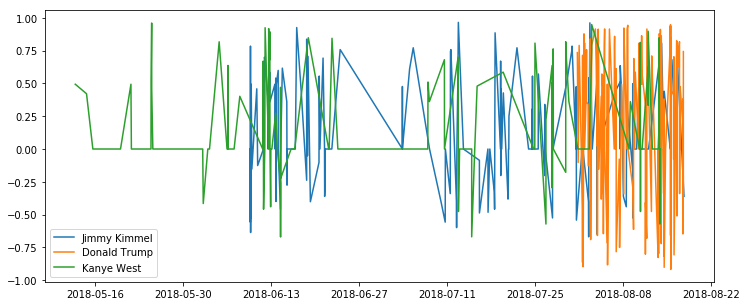

In [16]:
#sns.boxplot(fromjk.score)
#sns.boxplot(fromdt.score)
#sns.boxplot(fromk.score)



celebrities = pd.concat([fromjk, fromdt, fromk], sort=True)
names = ["Jimmy Kimmel", "Donald Trump", "Kanye West"]


display(celebrities.groupby(['user_name'])['score'].describe())


plt.figure(figsize=(12,5))
plt.plot(fromjk.score)
plt.plot(fromdt.score)
plt.plot(fromk.score)


plt.legend(loc='lower left')
plt.legend(labels=names)


Text(0.5,1,'Score Distribution by User name')

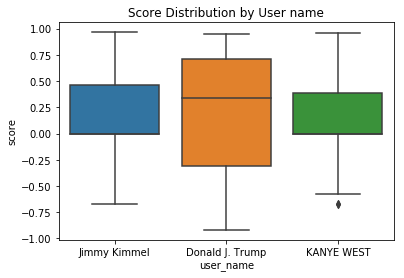

In [17]:
sns.boxplot(data=celebrities, x='user_name', y='score')
plt.title('Score Distribution by User name')

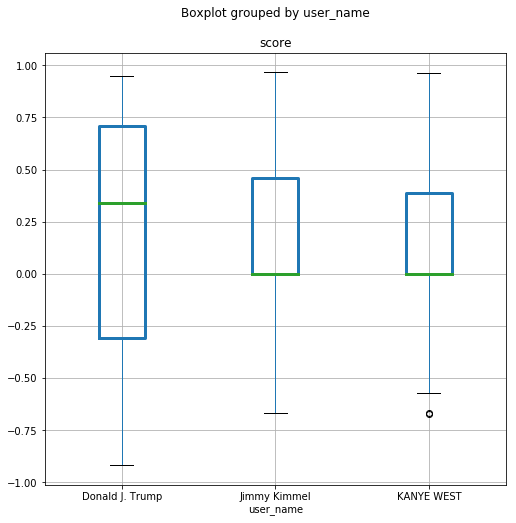

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
plt.suptitle('')
boxprops = dict(linestyle='-', linewidth=3, color='k')
medianprops = dict(linestyle='-', linewidth=3, color='k')
celebrities.boxplot(column=['score'], by='user_name', ax=ax, boxprops=boxprops,
                medianprops=medianprops)

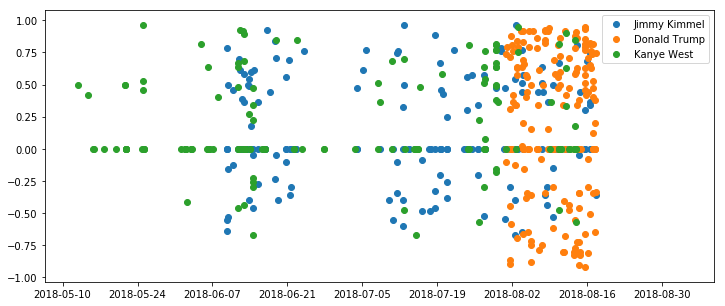

In [19]:
plt.figure(figsize=(12,5))
plt.scatter(x=fromjk.index, y= fromjk.score)
plt.scatter(x=fromdt.index, y=fromdt.score)
plt.scatter(x=fromk.index, y=fromk.score)

#plt.boxplot(x=sixhours['score'])
plt.legend(loc='lower left')
plt.legend(labels=names)
#plt.xlim('2018-07-30', '2018-08-18')

In [20]:
Donald_Trump= fromdt.score.mean()
Jimmy_Kimmel= fromjk.score.mean()
Kanye_West=fromk.score.mean()
means = [Donald_Trump, Jimmy_Kimmel, Kanye_West]
names = ["Donald_Trump", "Jimmy_Kimmel", "Kanye_West"]

### Lets focus on tweets about Kanye

In [21]:
allkanye['score'] = pd.to_numeric(allkanye['score'])
kanye['score'] = pd.to_numeric(kanye['score'])
kanyewest['score'] = pd.to_numeric(kanyewest['score'])

                               id  retweet_count  favorite_count  \
created_at                                                         
2018-08-07 12:00:00  1.026842e+18       3.333333        0.000000   
2018-08-07 16:00:00  1.026889e+18       2.888889        0.814815   
2018-08-07 20:00:00  1.026949e+18       9.666667        0.777778   
2018-08-08 00:00:00  1.027005e+18       2.083333        0.166667   
2018-08-08 04:00:00  1.027062e+18       6.700000        0.300000   

                          user_id  user_followers_count  user_friends_count  \
created_at                                                                    
2018-08-07 12:00:00  4.428841e+17            398.666667          730.833333   
2018-08-07 16:00:00  3.295383e+17           3400.111111         2522.296296   
2018-08-07 20:00:00  3.741948e+17           8109.666667         6523.333333   
2018-08-08 00:00:00  3.246788e+17           1869.791667          941.208333   
2018-08-08 04:00:00  5.525325e+17            794.

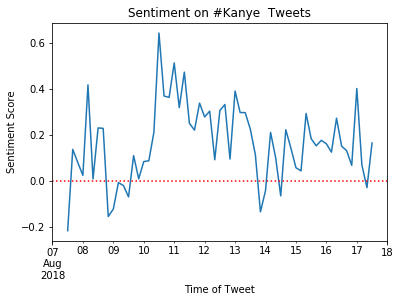

In [22]:
hourly = kanye.resample("4H").mean()
print(hourly.head())
hourly['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Sentiment on #Kanye  Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-07 12:00:00             0.0                 395.0               443.5   
2018-08-07 16:00:00             0.0                 236.5               283.0   
2018-08-07 20:00:00             0.0                 278.0               345.5   
2018-08-08 00:00:00             0.0                 311.0               424.0   
2018-08-08 04:00:00             0.0                 243.0               439.5   

                       score  
created_at                    
2018-08-07 12:00:00 -0.13345  
2018-08-07 16:00:00  0.00000  
2018-08-07 20:00:00  0.01290  
2018-08-08 00:00:00  0.00000  
2018-08-08 04:00:00  0.54450  


(426048, 426264)

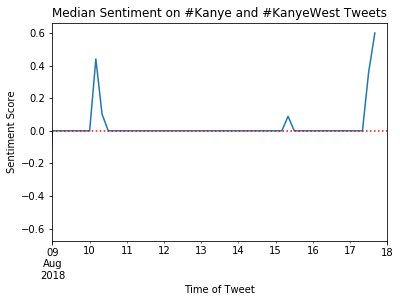

In [25]:
allkanye.index = pd.to_datetime(allkanye.index, errors='coerce')
allhourly = allkanye.resample("4H").median()
print(allhourly.head())
allhourly['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Median Sentiment on #Kanye and #KanyeWest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')
datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

(426048, 426264)

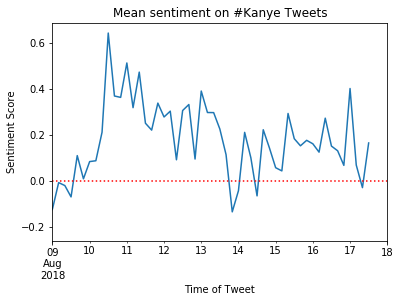

In [26]:
hkanye = kanye.resample("4H").mean()
hkanye['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #Kanye Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')
datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-09 00:00:00       14.478992           3338.689076         1777.781513   
2018-08-09 04:00:00        0.212121           3504.416667          963.151515   
2018-08-09 08:00:00        0.071429           1484.214286          638.571429   
2018-08-09 12:00:00        0.361111           7725.236111         1929.194444   
2018-08-09 16:00:00       11.716216           3431.648649          896.081081   

                        score  
created_at                     
2018-08-09 00:00:00  0.024754  
2018-08-09 04:00:00  0.029889  
2018-08-09 08:00:00  0.030155  
2018-08-09 12:00:00  0.020538  
2018-08-09 16:00:00  0.165334  


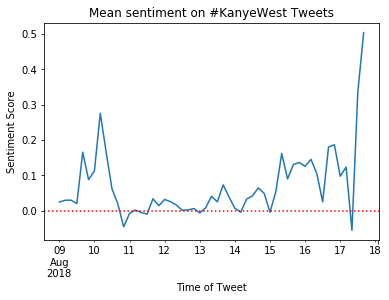

In [27]:
hwest = kanyewest.resample("4H").mean()
print(hwest.head())
hwest['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #KanyeWest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

(426048, 426264)

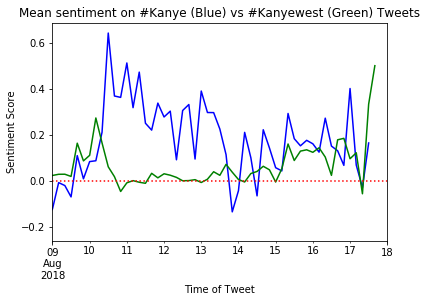

In [28]:
hkanye['score'].plot(color='blue')
hwest['score'].plot(color = 'green')
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #Kanye (Blue) vs #Kanyewest (Green) Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')
datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-07 12:00:00        0.000000            398.666667          730.833333   
2018-08-07 16:00:00        0.846154           1628.961538          931.769231   
2018-08-07 20:00:00        0.812500            461.062500          559.437500   
2018-08-08 00:00:00        0.173913           1906.956522          941.739130   
2018-08-08 04:00:00        0.300000            794.000000          945.600000   

                        score  
created_at                     
2018-08-07 12:00:00 -0.215950  
2018-08-07 16:00:00  0.156681  
2018-08-07 20:00:00  0.112481  
2018-08-08 00:00:00  0.026357  
2018-08-08 04:00:00  0.419630  


(426048, 426264)

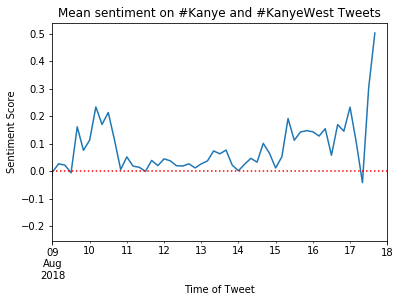

In [29]:
hall = allkanye.resample("4H").mean()
print(hall.head())
hall['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #Kanye and #KanyeWest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')
datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)


### Number of tweets

created_at
2018-08-07 12:00:00     6
2018-08-07 16:00:00    27
2018-08-07 20:00:00    18
2018-08-08 00:00:00    24
2018-08-08 04:00:00    10
Freq: 4H, Name: text, dtype: int64


(426048, 426264)

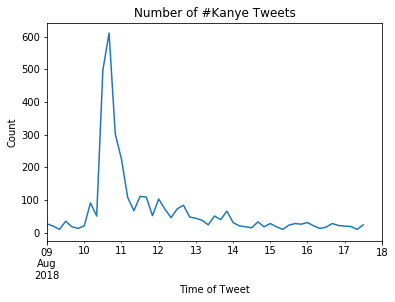

In [30]:
ckanye = kanye['text'].resample("4H").count()
print(ckanye.head())
ckanye.plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of #Kanye Tweets")
datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

created_at
2018-08-09 00:00:00    119
2018-08-09 04:00:00    132
2018-08-09 08:00:00     56
2018-08-09 12:00:00     72
2018-08-09 16:00:00     74
Name: text, dtype: int64


Text(0.5,1,'Number of #Kanyewest Tweets')

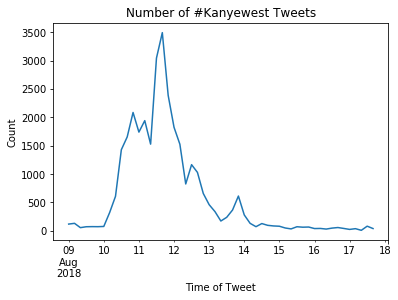

In [31]:
cwest = kanyewest['text'].resample("4H").count()
print(cwest.head())
cwest.plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of #Kanyewest Tweets")

(426048, 426264)

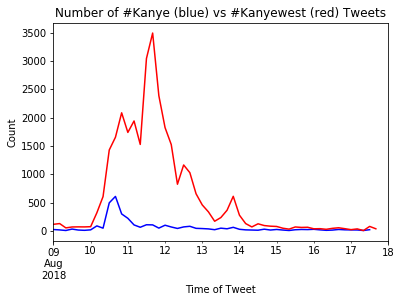

In [32]:
ckanye.plot(color='blue')
cwest.plot(color='red')
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of #Kanye (blue) vs #Kanyewest (red) Tweets")
datemin = np.datetime64(cwest.index[0], 'D')
datemax = np.datetime64(cwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

created_at
2018-06-09 12:00:00    9
2018-06-10 00:00:00    0
2018-06-10 12:00:00    2
2018-06-11 00:00:00    0
2018-06-11 12:00:00    2
Freq: 12H, Name: text, dtype: int64


Text(0.5,1,'Number of Tweets by Jimmy Kimmel')

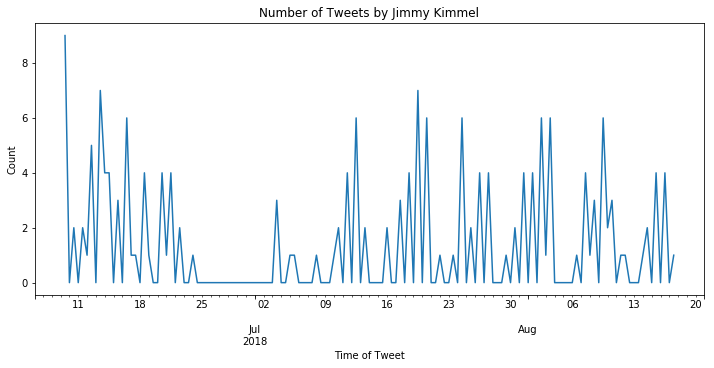

In [33]:
plt.figure(figsize=(12,5))
cjk = fromjk['text'].resample("12H").count()
print(cjk.head())
cjk.plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Count')
plt.title("Number of Tweets by Jimmy Kimmel")

In [34]:
print("Tweet: ", fromjk['text'][1])
print("Score: ",fromjk['score'][1])
print(fromjk.iloc[1,:])
display(fromjk.head(2))

Tweet:  An important message from your innocent friends at Apple 
Score:  0.743
id                                                    1030090458830008320
text                    An important message from your innocent friend...
retweet_count                                                         158
favorite_count                                                        708
source                                                       Media Studio
country                                                               NaN
user_id                                                          26053643
user_screen_name                                              jimmykimmel
user_name                                                    Jimmy Kimmel
user_created_at                                       2009-03-23 18:05:56
user_followers_count                                             11398250
user_friends_count                                                    600
user_location                   

,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-17 16:39:00,1030494214042177536,"White people, space &amp; robots - three ridic...",25,140,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,-0.3612
2018-08-16 13:54:38,1030090458830008320,An important message from your innocent friend...,158,708,Media Studio,NaN,26053643,jimmykimmel,Jimmy Kimmel,2009-03-23 18:05:56,11398250,600,Los Angeles,0.7430


In [35]:
print("Tweet: ", fromk['text'][1])
print("Score: ",fromk['score'][1])

print("Tweet: ", fromk['text'][0])
print("Score: ",fromk['score'][0])

print("Tweet: ", fromk['text'][2])
print("Score: ",fromk['score'][2])

print(fromk.iloc[1,:])
display(fromk.head(3))

Tweet:  deprogram
Score:  0.0
Tweet:  Yeezy slides on vacay 
Score:  0.0
Tweet:  we’re no longer fighting for change we’re simply changing things
Score:  -0.5719
id                      1029102613575348224
text                              deprogram
retweet_count                          5837
favorite_count                        26442
source                   Twitter for iPhone
country                                 NaN
user_id                           169686021
user_screen_name                  kanyewest
user_name                        KANYE WEST
user_created_at         2010-07-22 23:00:05
user_followers_count               28018750
user_friends_count                        8
user_location                           NaN
score                                     0
Name: 2018-08-13 20:29:17, dtype: object


,id,text,retweet_count,favorite_count,source,country,user_id,user_screen_name,user_name,user_created_at,user_followers_count,user_friends_count,user_location,score
created_at,,,,,,,,,,,,,,
2018-08-13 22:18:50,1029130182978752513,Yeezy slides on vacay,4794,52506,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:29:17,1029102613575348224,deprogram,5837,26442,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,0.0000
2018-08-13 20:28:58,1029102535389237250,we’re no longer fighting for change we’re simp...,24937,98032,Twitter for iPhone,NaN,169686021,kanyewest,KANYE WEST,2010-07-22 23:00:05,28018750,8,NaN,-0.5719


                     favorite_count  user_followers_count  user_friends_count  \
created_at                                                                      
2018-08-09 00:00:00        0.062500           3328.812500         1706.000000   
2018-08-09 01:00:00        0.000000           2591.400000         2174.000000   
2018-08-09 02:00:00        0.333333           7679.250000         9012.916667   
2018-08-09 03:00:00       19.976744           2778.313953          758.546512   
2018-08-09 04:00:00        0.057692            723.711538          777.538462   

                        score  
created_at                     
2018-08-09 00:00:00  0.283544  
2018-08-09 01:00:00  0.096240  
2018-08-09 02:00:00 -0.201333  
2018-08-09 03:00:00  0.003998  
2018-08-09 04:00:00  0.003658  


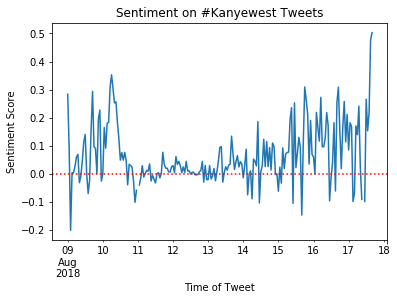

In [36]:
westhourly = kanyewest.resample("1H").mean()
print(westhourly.head())
westhourly['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Sentiment on #Kanyewest Tweets")

plt.axhline(y=0, color = 'red', linestyle = ':')

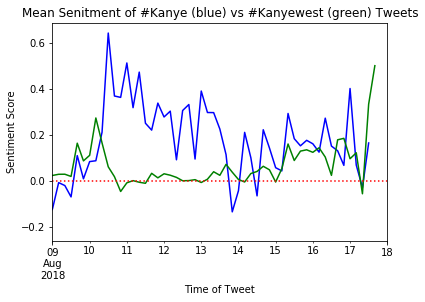

In [37]:
hkanye['score'].plot(color='blue')
hwest['score'].plot(color='green')
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean Senitment of #Kanye (blue) vs #Kanyewest (green) Tweets")
datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

plt.axhline(y=0, color = 'red', linestyle = ':')

created_at
2018-08-07 12:00:00     6
2018-08-07 16:00:00    26
2018-08-07 20:00:00    16
2018-08-08 00:00:00    23
2018-08-08 04:00:00    10
Name: text, dtype: int64


Text(0.5,1,'Number of Tweets with #Kanye or #Kanyewest')

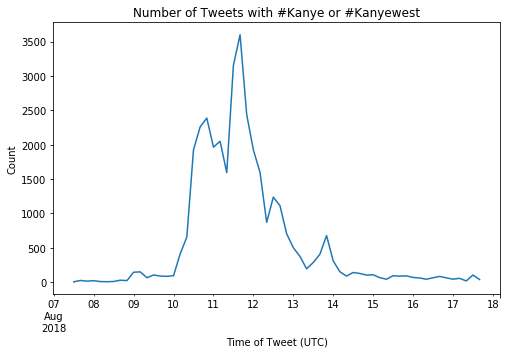

In [38]:
plt.figure(figsize=(8,5))
allkanyec = allkanye['text'].resample("4H").count()
print(allkanyec.head())
allkanyec.plot()
plt.xlabel('Time of Tweet (UTC)')
plt.ylabel('Count')
plt.title("Number of Tweets with #Kanye or #Kanyewest")

In [41]:
iphone = allkanye[allkanye['source']== 'Twitter for iPhone']
android = allkanye[allkanye['source']== 'Twitter for Android']
instagram = allkanye[allkanye['source']== 'Instagram']
web = allkanye[allkanye['source']== 'Twitter Web Client']
facebook = allkanye[allkanye['source']== 'Facebook']
hipster = allkanye[allkanye['source']== 'HipsterTweets']
twitterlite = allkanye[allkanye['source']== 'Twitter Lite']
ipad = allkanye[allkanye['source']== 'Twitter for iPad']
tweetdeck = allkanye[allkanye['source']== 'TweetDeck']



iphonedf = pd.DataFrame(iphone)
androiddf = pd.DataFrame(android)
instagramdf = pd.DataFrame(instagram)
webdf = pd.DataFrame(web)
facebookdf = pd.DataFrame(facebook)
hipsterdf = pd.DataFrame(hipster)
twitterlitedf = pd.DataFrame(twitterlite)
ipaddf = pd.DataFrame(ipad)
tweetdeckdf = pd.DataFrame(tweetdeck)

topsourcesdf = iphonedf.append(androiddf)
topsourcesdf = topsourcesdf.append(instagramdf).append(webdf).append(facebookdf).append(hipsterdf).append(twitterlitedf).append(ipaddf).append(tweetdeckdf)



X= (iphone['score'].mean(), android['score'].mean(), web['score'].mean(), twitterlite['score'].mean(),ipad['score'].mean(),instagram['score'].mean(),hipster['score'].mean(), tweetdeck['score'].mean())

print('iPhone mean score' , np.round(iphone['score'].mean(),2))
#print('iPhone score count' , iphone['score'].count())

print('Android mean score' , np.round(android['score'].mean(),2))
#print('Android score count' , android['score'].count())

print('Twitter Web User mean score' ,np.round(web['score'].mean(),2))
#print('Twitter Web User score count' , web['score'].count())

print('Twitter Lite mean score' , np.round(twitterlite['score'].mean(),2))
#print('Twitter Lite score count' , twitterlite['score'].count())

print('iPad mean score' , np.round(ipad['score'].mean(),2))
#print('iPad score count' , ipad['score'].count())

print('Instagram mean score' ,np.round(instagram['score'].mean(),2))
#print('Instagram score count' , instagram['score'].count())

print('HipsterTweets mean score' ,np.round(hipster['score'].mean(),2))
#print('HipsterTweets score count' , hipster['score'].count())

print('TweetDeck mean score', np.round(tweetdeck['score'].mean(),2))
#print('TweetDeck score count' , tweetdeck['score'].count())

iPhone mean score 0.03
Android mean score 0.06
Twitter Web User mean score 0.12
Twitter Lite mean score 0.12
iPad mean score 0.11
Instagram mean score 0.13
HipsterTweets mean score 0.21
TweetDeck mean score 0.09


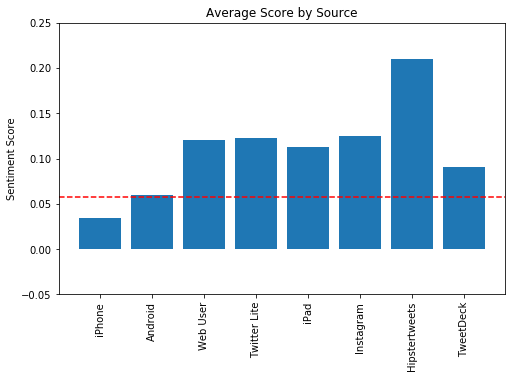

In [42]:
Y= (iphone['score'].mean(), android['score'].mean(), web['score'].mean(), twitterlite['score'].mean(),ipad['score'].mean(),instagram['score'].mean(),hipster['score'].mean(), tweetdeck['score'].mean())
X= ('iPhone', 'Android', 'Web User', 'Twitter Lite', 'iPad', 'Instagram', 'Hipstertweets', 'TweetDeck')
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
plt.margins(0.05)

plt.bar(X, Y)
plt.ylim((-0.05, 0.25))

plt.ylabel('Sentiment Score')
plt.title("Average Score by Source")
plt.axhline(y=0.05783387, color = 'red', linestyle = '--')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

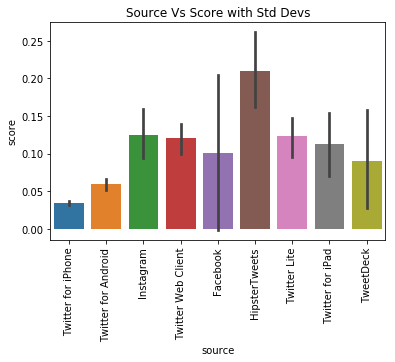

In [43]:
ax = sns.barplot(x='source', y='score', data=topsourcesdf)
plt.title('Source Vs Score with Std Devs')
plt.xticks(rotation=90)

In [44]:
display(iphone.describe())
display(android.describe())

,favorite_count,user_followers_count,user_friends_count,score
count,22039.000000,22039.000000,22039.000000,22039.000000
mean,3.577204,1696.958074,1091.769318,0.034065
std,445.048172,12311.052126,5401.554193,0.240111
min,0.000000,0.000000,0.000000,-0.918600
25%,0.000000,203.000000,205.000000,0.000000
50%,0.000000,444.000000,398.000000,0.000000
75%,0.000000,980.000000,806.000000,0.000000
max,65997.000000,981904.000000,422908.000000,0.953100


,favorite_count,user_followers_count,user_friends_count,score
count,8020.000000,8.020000e+03,8020.000000,8020.000000
mean,0.803242,2.058465e+03,1733.699875,0.059367
std,29.452525,1.810860e+04,4400.918369,0.343597
min,0.000000,0.000000e+00,0.000000,-0.923100
25%,0.000000,1.510000e+02,221.000000,0.000000
50%,0.000000,4.280000e+02,513.500000,0.000000
75%,0.000000,1.272000e+03,1452.250000,0.000000
max,2337.000000,1.530961e+06,91408.000000,0.962800


In [45]:
print('Total mean score: ' , allkanye['score'].mean())

Total mean score:  0.052376504727933


Text(0.5,1,'Number of Tweets per location')

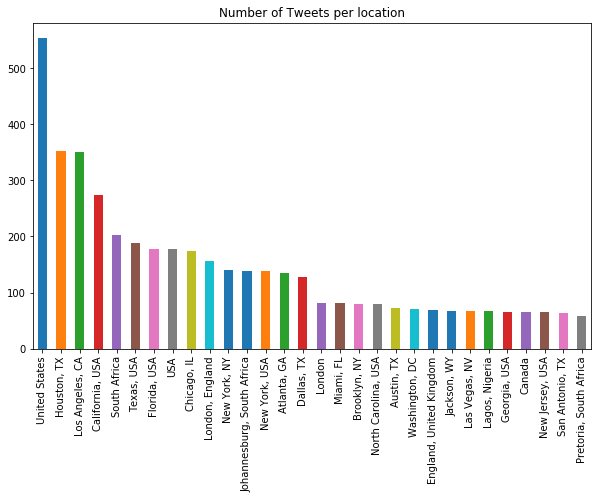

In [46]:
plt.figure(figsize=(10,6))
allkanye['user_location'].value_counts()[:30].plot(kind='bar')
plt.title('Number of Tweets per location')

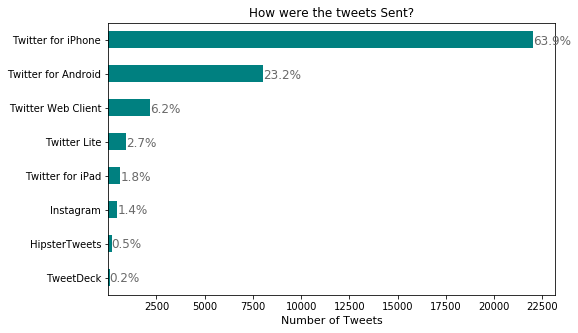

In [47]:
plt.figure(figsize=(8,5))
ax = allkanye['source'].value_counts()[:8].plot(kind='barh', color="teal")
ax.set_title("How were the tweets Sent?", fontsize=12)
ax.set_xlabel("Number of Tweets", fontsize=11);
ax.set_xticks([2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000, 22500])
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()/total)*100, 1))+'%', fontsize=12,
color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

In [48]:
allkanyedum = allkanye.copy()

allkanyedum.info()
pd.get_dummies(allkanyedum)
display(allkanyedum.corr())
#

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35322 entries, 2018-08-17 15:53:37 to 2018-08-09 00:00:09
Data columns (total 14 columns):
country                 273 non-null object
favorite_count          35319 non-null float64
id                      35321 non-null object
retweet_count           35320 non-null object
source                  35320 non-null object
text                    35322 non-null object
user_created_at         35320 non-null object
user_followers_count    35319 non-null float64
user_friends_count      35319 non-null float64
user_id                 35320 non-null object
user_location           24582 non-null object
user_name               35317 non-null object
user_screen_name        35320 non-null object
score                   35322 non-null float64
dtypes: float64(4), object(10)
memory usage: 4.0+ MB


,favorite_count,user_followers_count,user_friends_count,score
favorite_count,1.000000,0.003550,0.002783,0.000089
user_followers_count,0.003550,1.000000,0.075032,0.005596
user_friends_count,0.002783,0.075032,1.000000,0.037249
score,0.000089,0.005596,0.037249,1.000000


In [49]:
kanye_top_freq = allkanye.groupby(['text', 'score'])['text'].agg(
    {"code_count": len}).sort_values(
    "code_count", ascending=False).head(8).reset_index()

display(kanye_top_freq)
display(kanye_top_freq.text.iloc[0])
print('Score: ', kanye_top_freq.score.iloc[0])

display(kanye_top_freq.text.iloc[5])
print('Score: ', kanye_top_freq.score.iloc[5])

print(kanye_top_freq.text.iloc[2])
print('Score: ', kanye_top_freq.score.iloc[2])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,text,score,code_count
0,KanyeWest tries to stand up for trump and Jim...,0.0000,23271
1,"""You can't bully me\nLiberals can't bully me\...",0.8595,1221
2,Kanye West Confirmed That The Left And The Ne...,-0.7964,584
3,Let's Rock &amp; Roll Show \nKanye Patriot Lu...,0.0000,564
4,Kimmel is a good host... just take a break.. ...,0.4404,535
5,The media: Black lives (and voices) matter.\n...,0.6114,391
6,7 YEARS AGO TODAY. jayz kanyewest throneshit,0.0000,282
7,northwest asked kimkardashian why she is famo...,0.0000,275


' KanyeWest tries to stand up for trump and JimmyKimmel shuts em up with facts. 🔥 '

Score:  0.0


' The media: Black lives (and voices) matter.\n\nAlso the media: Hahaha! We silenced a black man. \n\nJimmyKimmelLive Kany…'

Score:  0.6114
 Kanye West Confirmed That The Left And The News Media ARE BULLIES

He Feared Their Bullying, It Took Him 18 Months To S…
Score:  -0.7964


In [50]:
withouttopfreq = android = allkanye[allkanye['text'] != ' KanyeWest tries to stand up for trump and JimmyKimmel shuts em up with facts. 🔥 ']
withouttopfreq.head()

,country,favorite_count,id,retweet_count,source,text,user_created_at,user_followers_count,user_friends_count,user_id,user_location,user_name,user_screen_name,score
created_at,,,,,,,,,,,,,,
2018-08-17 15:53:37,NaN,0.0,1030482792034062336,1,TweetDeck,Tomorrow author of HipHopRaisedMe and host o...,2014-12-28 20:48:15,320.0,405.0,2946476236,"London, England",No Chiefs,NoChiefsCo,0.1027
2018-08-17 15:52:50,NaN,0.0,1030482594662699014,1,TweetDeck,Tomorrow author of HipHopRaisedMe and host of...,2009-05-05 12:56:56,20300.0,3210.0,37917369,London,Thames & Hudson,thamesandhudson,0.1027
2018-08-17 15:43:33,NaN,0.0,1030480259404242944,1,Twitter for Android,I am a god\nEven though I'm a man of God\nMy ...,2018-06-14 08:38:05,21.0,114.0,1007180362341076993,"Ermelo, South Africa",S_boniso 💀💲🏆,kele_niso,0.9149
2018-08-17 15:00:08,NaN,0.0,1030469330759299072,0,HipsterTweets,street The Kids Are Our Future. NASIR out eve...,2016-02-27 01:04:44,33.0,2.0,703385241000550401,NaN,Hipster Kanye,KanyeHipster,0.0000
2018-08-17 14:36:05,NaN,0.0,1030463279615946752,3,Twitter for iPhone,"I uploaded a new episode, ""Ep. 68: Stomping i...",2017-10-11 00:26:00,226.0,356.0,917909110032617472,"Dallas, TX",Choppin It Up W/Q,choppinitup_pod,0.0000


(426048, 426264)

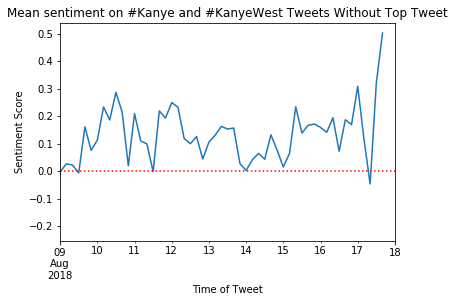

In [51]:
hno_top = withouttopfreq.resample("4H").mean()

hno_top['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Mean sentiment on #Kanye and #KanyeWest Tweets Without Top Tweet")

plt.axhline(y=0, color = 'red', linestyle = ':')

datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

(426048, 426264)

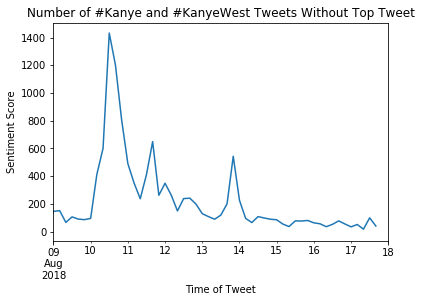

In [52]:
cno_top = withouttopfreq.resample("4H").count()

cno_top['score'].plot()
plt.xlabel('Time of Tweet')
plt.ylabel('Sentiment Score')
plt.title("Number of #Kanye and #KanyeWest Tweets Without Top Tweet")

#plt.axhline(y=0, color = 'red', linestyle = ':')

datemin = np.datetime64(hwest.index[0], 'D')
datemax = np.datetime64(hwest.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)

In [56]:
length = []

for index, row in allkanye.iterrows():
    tweet = row['text']
    row['length'] = (len(tweet))
    length.append(row['length'])
    
print(len(length))       
allkanye['length'] = length

35322


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 10 Text xticklabel objects>)

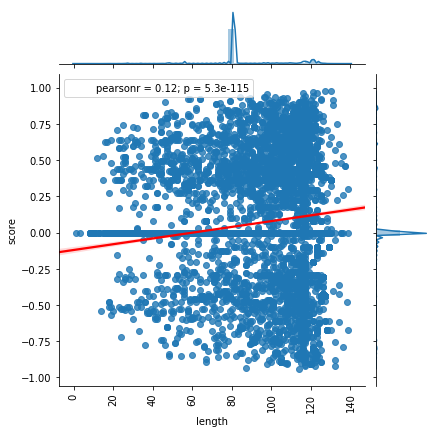

In [57]:
ax = sns.jointplot(x='length', y='score', data=allkanye, kind='reg', joint_kws={'line_kws':{'color':'red'}})
plt.xticks(rotation=90)



Text(0.5,1,'Score Vs Length of Tweet')

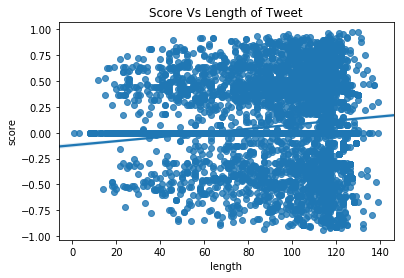

In [58]:
ax = sns.regplot(x='length', y='score', data=allkanye)
plt.title('Score Vs Length of Tweet')

In [59]:
chicago = allkanye[allkanye['user_location']== 'Chicago, IL']
london = allkanye[allkanye['user_location']== 'London, England']
newyork = allkanye[allkanye['user_location']== 'New York, NY']

threecities = chicago.append(london).append(newyork)
threecities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 2018-08-15 21:01:32 to 2018-08-09 11:04:14
Data columns (total 15 columns):
country                 10 non-null object
favorite_count          471 non-null float64
id                      471 non-null object
retweet_count           471 non-null object
source                  471 non-null object
text                    471 non-null object
user_created_at         471 non-null object
user_followers_count    471 non-null float64
user_friends_count      471 non-null float64
user_id                 471 non-null object
user_location           471 non-null object
user_name               471 non-null object
user_screen_name        471 non-null object
score                   471 non-null float64
length                  471 non-null int64
dtypes: float64(4), int64(1), object(10)
memory usage: 58.9+ KB


,count,mean,std,min,25%,50%,75%,max
user_location,,,,,,,,
"Chicago, IL",174.0,0.034112,0.285155,-0.8779,0.0,0.0,0.000,0.9377
"London, England",156.0,0.038486,0.207812,-0.5661,0.0,0.0,0.000,0.8595
"New York, NY",141.0,0.125126,0.252069,-0.7418,0.0,0.0,0.296,0.8595


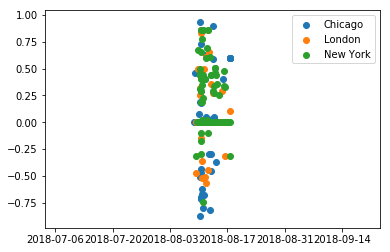

In [60]:
citynames = ["Chicago", "London", "New York"]


display(threecities.groupby(['user_location'])['score'].describe())


plt.scatter(x=chicago.index, y= chicago.score)
plt.scatter(x=london.index, y=london.score)
plt.scatter(x=newyork.index, y=newyork.score)


plt.legend(loc='lower left')
plt.legend(labels=citynames)


(array([736916., 736917., 736918., 736919., 736920., 736921., 736922.,
        736923.]), <a list of 8 Text xticklabel objects>)

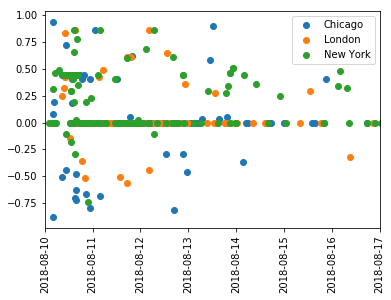

In [61]:
plt.scatter(x=chicago.index, y= chicago.score)
plt.scatter(x=london.index, y=london.score)
plt.scatter(x=newyork.index, y=newyork.score)


plt.legend(loc='lower left')
plt.legend(labels=citynames)
datemax = np.datetime64(newyork.index[0], 'D')
datemin = np.datetime64(newyork.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)
plt.xticks(rotation=90)

In [62]:
hchicago = chicago.resample("12H").mean()
hlondon = london.resample("12H").mean()
hnewyork = newyork.resample("12H").mean()

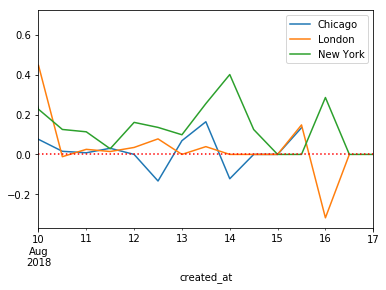

In [63]:
hchicago.score.plot()
hlondon.score.plot()
y=hnewyork.score.plot()


plt.legend(loc='lower left')
plt.legend(labels=citynames)
datemax = np.datetime64(newyork.index[0], 'D')
datemin = np.datetime64(newyork.index[-1], 'D') + np.timedelta64(1, 'D')
plt.xlim(datemin, datemax)
#plt.xticks(rotation=90)
plt.axhline(y=0, color = 'red', linestyle = ':')

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


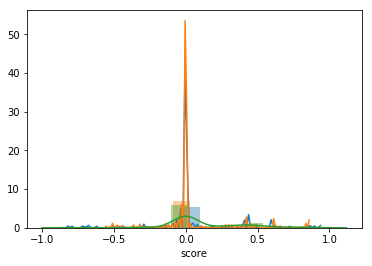

In [64]:
sns.distplot(chicago['score'])
sns.distplot(london['score'])
sns.distplot(newyork['score'])

(0, 5)

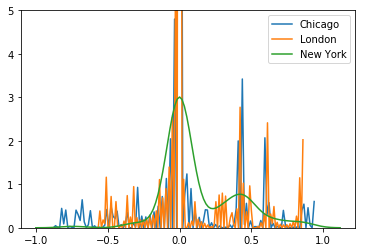

In [65]:
sns.kdeplot(chicago['score'], label='Chicago')
sns.kdeplot(london['score'], label="London")
sns.kdeplot(newyork['score'], label="New York")
plt.legend()
plt.ylim(0, 5)

In [66]:
from scipy import stats
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_ind(chicago['score'], london['score'], equal_var = False))

t-statistic = -0.160 pvalue = 0.8727


In [68]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_ind(chicago['score'], newyork['score'], equal_var = False))
alpha = 0.05

t-statistic = -3.004 pvalue = 0.0029


In [69]:
from scipy.stats import f_oneway
stat, p = f_oneway(chicago['score'], newyork['score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=8.794, p=0.003


In [70]:
from scipy.stats import f_oneway
stat, p = f_oneway(chicago['score'], newyork['score'], london['score'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=6.179, p=0.002
Different distributions (reject H0)


In [71]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_ind(iphone['score'], android['score'], equal_var = False))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

t-statistic = -24.434 pvalue = 0.0000
Different distributions (reject H0)


In [74]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_ind(fromk['score'], fromdt['score'], equal_var = False))

print('Same distributions (fail to reject H0)')


t-statistic = -0.676 pvalue = 0.4993
Same distributions (fail to reject H0)
